# Age Gender Ethnicity_Detection : 
#### Start on 7 Jul 22

#### End on 8 Jul 22

In [1]:
path = 'age_gender.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
data = pd.read_csv(path)
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [4]:
len(data['pixels'][0])

8917

In [5]:
len(data['pixels'][1])

9064

In [6]:
len(data['pixels'][2])

8767

In [7]:
len(data['age'].unique())
# No of Unique ages

104

In [8]:
img = np.array(data['pixels'][5].split(' '))
print(len(img))
# plt.imshow(img)
# plt.show()

2304


## Fitting for age

In [9]:
x = data['pixels']
y = data['age']
print(x.shape)
print(y.shape)

(23705,)
(23705,)


In [10]:
img_arr = []
for i in x:
    img = (np.array(i.split()).astype('float32'))/255
    img_arr.append(img)

In [11]:
img_arr = np.array(img_arr)
img_arr[1].shape

(2304,)

In [12]:
img_arr.shape

(23705, 2304)

In [13]:
x = img_arr
x

array([[0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
        0.57254905],
       [0.6431373 , 0.2901961 , 0.43529412, ..., 0.7137255 , 0.6666667 ,
        0.5803922 ],
       [0.2627451 , 0.27450982, 0.2784314 , ..., 0.4392157 , 0.43529412,
        0.42352942],
       ...,
       [0.23137255, 0.19607843, 0.14509805, ..., 0.38431373, 0.30588236,
        0.30588236],
       [0.1764706 , 0.42352942, 0.47058824, ..., 0.1254902 , 0.13725491,
        0.13725491],
       [0.6117647 , 0.6313726 , 0.627451  , ..., 0.74509805, 0.72156864,
        0.68235296]], dtype=float32)

In [14]:
from keras.utils import to_categorical

2022-07-08 16:27:51.748856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-08 16:27:51.748876: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
x =np.reshape(x,[-1,48,48,1])
print(x.shape)

(23705, 48, 48, 1)


In [16]:
input_shape = x.shape[1:]
input_shape

(48, 48, 1)

In [17]:
num_outputs =1
batch_size =128
kernel_size = 3
pool_size = 2
filters = 64
dropout =0.2

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization
from keras import callbacks


# Age Prediction:

In [20]:
y = data['age']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(18964, 48, 48, 1)
(4741, 48, 48, 1)
(18964,)


In [22]:
age_model = Sequential()
age_model.add(Conv2D(filters=128,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
age_model.add(BatchNormalization())
age_model.add(MaxPooling2D(pool_size=pool_size))
age_model.add(Conv2D(filters=128,kernel_size=kernel_size,activation='relu'))
age_model.add(BatchNormalization())
age_model.add(MaxPooling2D(pool_size=pool_size))
age_model.add(Conv2D(filters=64,kernel_size=kernel_size,activation='relu'))
age_model.add(MaxPooling2D(pool_size=pool_size))
age_model.add(Conv2D(filters=64,kernel_size=kernel_size,activation='relu'))
age_model.add(Flatten())
age_model.add(Dropout(dropout))
age_model.add(Dense(num_outputs))
age_model.add(Activation('relu'))
age_model.summary()




class myCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 128)      512       
 hNormalization)                                                 
                                                        

2022-07-08 16:27:54.457050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 16:27:54.457219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-08 16:27:54.457257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-08 16:27:54.457291: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-08 16:27:54.457324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [23]:
age_model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [24]:
age_model.fit(x_train,y_train,epochs=20,batch_size=batch_size,validation_data=[x_test,y_test],callbacks=[callback])

Epoch 1/20
149/149 [==============================] - 66s 441ms/step - loss: 238.0455 - mae: 11.5319 - val_loss: 426.1924 - val_mae: 14.9402
Epoch 2/20
149/149 [==============================] - 65s 435ms/step - loss: 119.5156 - mae: 8.1457 - val_loss: 355.2486 - val_mae: 15.7983
Epoch 3/20
149/149 [==============================] - 65s 438ms/step - loss: 97.5158 - mae: 7.3265 - val_loss: 430.8748 - val_mae: 18.0282
Epoch 4/20
149/149 [==============================] - 65s 438ms/step - loss: 84.5811 - mae: 6.8436 - val_loss: 130.2689 - val_mae: 8.8455
Epoch 5/20
149/149 [==============================] - 65s 439ms/step - loss: 76.3499 - mae: 6.5115 - val_loss: 114.5641 - val_mae: 8.3595
Epoch 6/20
149/149 [==============================] - ETA: 0s - loss: 68.2428 - mae: 6.1665
Reached 110 val_loss so cancelling training!
149/149 [==============================] - 65s 438ms/step - loss: 68.2428 - mae: 6.1665 - val_loss: 102.6069 - val_mae: 7.2866


In [25]:
loss,mae = age_model.evaluate(x_test,y_test,batch_size=batch_size)
print("Mean Squared error:",mae)

38/38 [==============================] - 4s 93ms/step - loss: 102.6069 - mae: 7.2866
Mean Squared error: 7.286561012268066


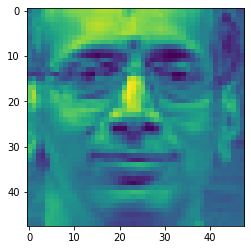

1/1 [==============================] - 0s 68ms/step
Prediction : [[48.90482]]
Actual:  45


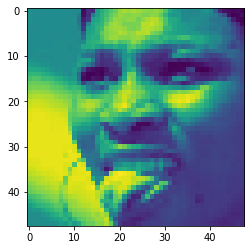

1/1 [==============================] - 0s 11ms/step
Prediction : [[31.402771]]
Actual:  36


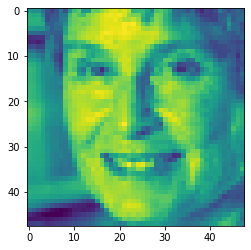

1/1 [==============================] - 0s 11ms/step
Prediction : [[46.70871]]
Actual:  50


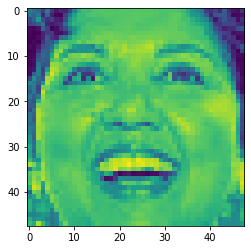

1/1 [==============================] - 0s 11ms/step
Prediction : [[28.30545]]
Actual:  56


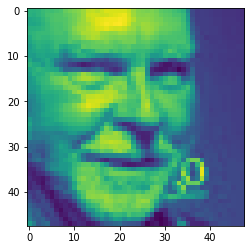

1/1 [==============================] - 0s 11ms/step
Prediction : [[59.667393]]
Actual:  62


In [26]:
# y_test[51]
for i in range(5):
    rand_index = np.random.randint(1,4741)
    y_index = y_test.index[rand_index]
    test = np.reshape(x_test[rand_index],[1,48,48,1])
    img = x_test[rand_index].reshape(48,48)
    plt.imshow(img)
    plt.show()
    y = age_model.predict(test)
    print("Prediction :",y)
    print("Actual: ",y_test[y_index])
    

# Gender Prediction:

In [49]:
y =data['gender']

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(18964, 48, 48, 1)
(4741, 48, 48, 1)
(18964,)


In [51]:
gen_model = Sequential()
gen_model.add(Conv2D(128,kernel_size=kernel_size,input_shape=input_shape,activation='relu'))
gen_model.add(BatchNormalization())
gen_model.add(MaxPooling2D(pool_size))
gen_model.add(Conv2D(128,kernel_size=kernel_size,activation='relu'))
gen_model.add(BatchNormalization())
gen_model.add(MaxPooling2D(pool_size))
gen_model.add(Conv2D(64,kernel_size=kernel_size,activation='relu'))
gen_model.add(MaxPooling2D(pool_size))
gen_model.add(Conv2D(64,kernel_size=kernel_size,activation='relu'))
gen_model.add(Flatten())
gen_model.add(Dropout(dropout))
gen_model.add(Dense(1,activation='sigmoid'))
gen_model.summary()


class myCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.875):
            print("\nReached 89% val_acc so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 46, 46, 128)       1280      
                                                                 
 batch_normalization_10 (Bat  (None, 46, 46, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 batch_normalization_11 (Bat  (None, 21, 21, 128)      512       
 chNormalization)                                                
                                                      

In [52]:
gen_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
gen_model.fit(x_train,y_train,epochs=20,validation_data=[x_test,y_test],batch_size =128,callbacks=[callback])

Epoch 1/20
149/149 [==============================] - 66s 440ms/step - loss: 0.4637 - accuracy: 0.7814 - val_loss: 0.8773 - val_accuracy: 0.5206
Epoch 2/20
149/149 [==============================] - 65s 435ms/step - loss: 0.3172 - accuracy: 0.8590 - val_loss: 0.6233 - val_accuracy: 0.5444
Epoch 3/20
149/149 [==============================] - 67s 450ms/step - loss: 0.2766 - accuracy: 0.8802 - val_loss: 0.5872 - val_accuracy: 0.6437
Epoch 4/20
149/149 [==============================] - 65s 434ms/step - loss: 0.2396 - accuracy: 0.8979 - val_loss: 0.3107 - val_accuracy: 0.8675
Epoch 5/20
149/149 [==============================] - ETA: 0s - loss: 0.2141 - accuracy: 0.9090
Reached 89% val_acc so cancelling training!
149/149 [==============================] - 65s 436ms/step - loss: 0.2141 - accuracy: 0.9090 - val_loss: 0.2674 - val_accuracy: 0.8865


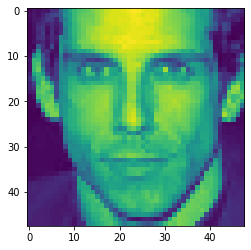

1/1 [==============================] - 0s 54ms/step
Prediction : [[0.01045488]]
Actual:  0


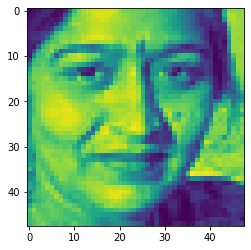

1/1 [==============================] - 0s 12ms/step
Prediction : [[0.94516724]]
Actual:  1


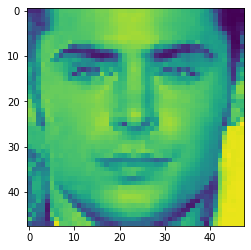

1/1 [==============================] - 0s 12ms/step
Prediction : [[0.00069318]]
Actual:  0


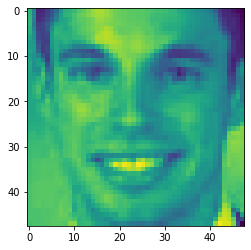

1/1 [==============================] - 0s 12ms/step
Prediction : [[0.01607737]]
Actual:  0


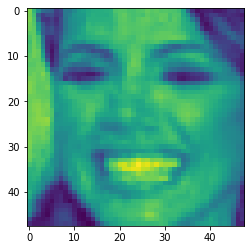

1/1 [==============================] - 0s 13ms/step
Prediction : [[0.9645606]]
Actual:  0


In [54]:
for i in range(5):
    rand_index = np.random.randint(1,4741)
    y_index = y_test.index[rand_index]
    test = np.reshape(x_test[rand_index],[1,48,48,1])
    img = x_test[rand_index].reshape(48,48)
    plt.imshow(img)
    plt.show()
    y = gen_model.predict(test)
    print("Prediction :",y)
    print("Actual: ",y_test[y_index])

# Ethinicity Prediction:

In [61]:
y = data['ethnicity']
y = to_categorical(y)


In [62]:
print(y.shape)

(23705, 5)


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18964, 48, 48, 1)
(4741, 48, 48, 1)
(18964, 5)
(4741, 5)


In [64]:
eth_model = Sequential()
eth_model.add(Conv2D(256,kernel_size=kernel_size,input_shape=input_shape,activation='relu'))
eth_model.add(MaxPooling2D(pool_size))
eth_model.add(Conv2D(256,kernel_size=kernel_size,activation='relu'))
eth_model.add(MaxPooling2D(pool_size))
eth_model.add(Conv2D(256,kernel_size=kernel_size,activation='relu'))
eth_model.add(MaxPooling2D(pool_size))
eth_model.add(Conv2D(256,kernel_size=kernel_size,activation='relu'))
eth_model.add(Flatten())
eth_model.add(Dropout(dropout))
eth_model.add(Dense(5))
eth_model.add(Activation('softmax'))
eth_model.summary()



class myCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.777):
            print("\nReached 79% val_acc so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 46, 46, 256)       2560      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 21, 21, 256)       590080    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 10, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 256)         590080    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 4, 4, 256)       

In [65]:
eth_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
eth_model.fit(x_train,y_train,epochs=20,validation_data=[x_test,y_test],batch_size =128,callbacks=[callback])

Epoch 1/20
149/149 [==============================] - 149s 997ms/step - loss: 1.3638 - accuracy: 0.4650 - val_loss: 1.1135 - val_accuracy: 0.5879
Epoch 2/20
149/149 [==============================] - 145s 975ms/step - loss: 0.9740 - accuracy: 0.6424 - val_loss: 0.8779 - val_accuracy: 0.6885
Epoch 3/20
149/149 [==============================] - 145s 975ms/step - loss: 0.8418 - accuracy: 0.7001 - val_loss: 0.7880 - val_accuracy: 0.7188
Epoch 4/20
149/149 [==============================] - 145s 976ms/step - loss: 0.7544 - accuracy: 0.7344 - val_loss: 0.7506 - val_accuracy: 0.7357
Epoch 5/20
149/149 [==============================] - 146s 978ms/step - loss: 0.7080 - accuracy: 0.7501 - val_loss: 0.6940 - val_accuracy: 0.7549
Epoch 6/20
149/149 [==============================] - 145s 976ms/step - loss: 0.6624 - accuracy: 0.7683 - val_loss: 0.6842 - val_accuracy: 0.7633
Epoch 7/20
149/149 [==============================] - 145s 976ms/step - loss: 0.6241 - accuracy: 0.7847 - val_loss: 0.6864 -

In [68]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

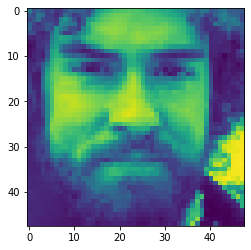

1/1 [==============================] - 0s 43ms/step
Prediction : 0
Actual:  [1. 0. 0. 0. 0.]


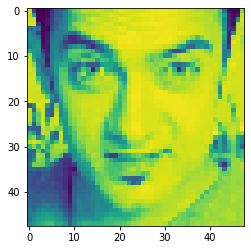

1/1 [==============================] - 0s 13ms/step
Prediction : 0
Actual:  [1. 0. 0. 0. 0.]


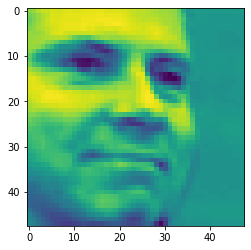

1/1 [==============================] - 0s 13ms/step
Prediction : 0
Actual:  [1. 0. 0. 0. 0.]


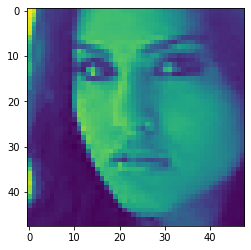

1/1 [==============================] - 0s 13ms/step
Prediction : 3
Actual:  [1. 0. 0. 0. 0.]


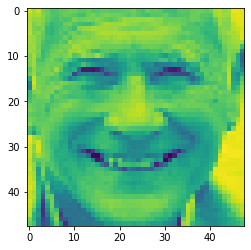

1/1 [==============================] - 0s 12ms/step
Prediction : 0
Actual:  [1. 0. 0. 0. 0.]


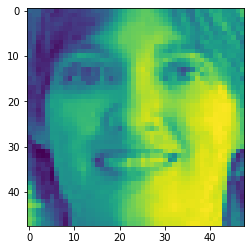

1/1 [==============================] - 0s 13ms/step
Prediction : 0
Actual:  [1. 0. 0. 0. 0.]


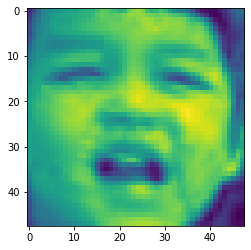

1/1 [==============================] - 0s 12ms/step
Prediction : 2
Actual:  [0. 0. 1. 0. 0.]


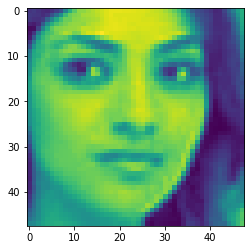

1/1 [==============================] - 0s 12ms/step
Prediction : 3
Actual:  [0. 0. 0. 0. 1.]


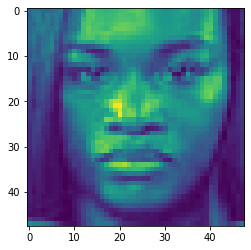

1/1 [==============================] - 0s 13ms/step
Prediction : 1
Actual:  [0. 1. 0. 0. 0.]


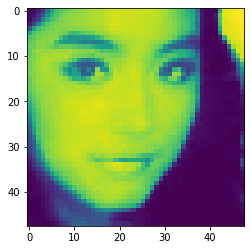

1/1 [==============================] - 0s 12ms/step
Prediction : 2
Actual:  [0. 0. 1. 0. 0.]


In [69]:
for i in range(10):
    rand_index = np.random.randint(1,4741)
    test = np.reshape(x_test[rand_index],[1,48,48,1])
    img = x_test[rand_index].reshape(48,48)
    plt.imshow(img)
    plt.show()
    y = eth_model.predict(test)
    print("Prediction :",np.argmax(y))
    print("Actual: ",y_test[rand_index])

In [70]:
import pickle

In [71]:
pickle.dump(gen_model,open("gender_class_model.sav","wb"))
pickle.dump(eth_model,open("ethnicity_class_model.sav","wb"))
pickle.dump(age_model,open("age_class_model.sav","wb"))

INFO:tensorflow:Assets written to: ram://0cbb8d29-1c2b-44ba-a51b-458cdb3d4f54/assets


INFO:tensorflow:Assets written to: ram://0cbb8d29-1c2b-44ba-a51b-458cdb3d4f54/assets


INFO:tensorflow:Assets written to: ram://ec1ec73b-f96e-4d42-b072-65c02103bfe7/assets


INFO:tensorflow:Assets written to: ram://ec1ec73b-f96e-4d42-b072-65c02103bfe7/assets


INFO:tensorflow:Assets written to: ram://5cdcafbf-fc58-4840-992a-f15994ecb72a/assets


INFO:tensorflow:Assets written to: ram://5cdcafbf-fc58-4840-992a-f15994ecb72a/assets
